**Heatmap Visualization**

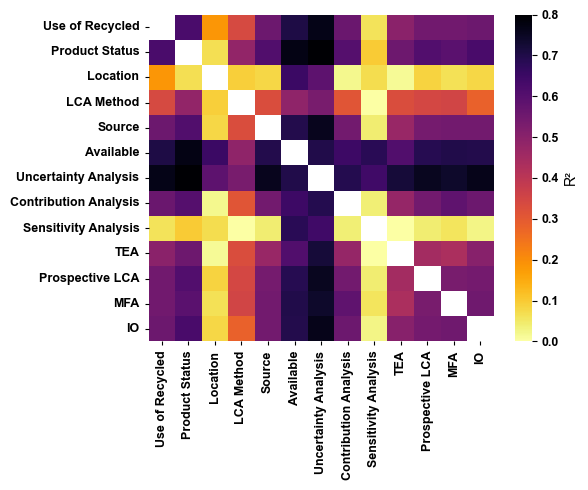

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

df = pd.read_excel("feature_Resin_plus_two.xlsx")
custom_order = [
    'whether 1', 'Product_Status', 'Location', 'LCIA', 'source',
    'available', 'Uncertainty Analysis', 'contribution analysis',
    'sensitivity analysis(SA)', 'TEA', 'prospective LCA', 'MFA', 'IO'
]

name_mapping = {
    'whether 1': 'Use of Recycled',
    'Product_Status': 'Product Status',
    'available': 'Available',
    'Uncertainty Analysis': 'Uncertainty Analysis',
    'contribution analysis': 'Contribution Analysis',
    'sensitivity analysis(SA)': 'Sensitivity Analysis',
    'TEA': 'TEA',
    'prospective LCA': 'Prospective LCA',
    'MFA': 'MFA',
    'IO': 'IO',
    'Location': 'Location',
    'LCIA': 'LCA Method',
    'source': 'Source'
}

r2_matrix = pd.DataFrame(np.nan, index=custom_order, columns=custom_order)
for _, row in df.iterrows():
    i, j, r2 = row['Feature_2'], row['Feature_3'], row['R2']
    if i in custom_order and j in custom_order:
        r2_matrix.loc[i, j] = r2
        r2_matrix.loc[j, i] = r2  

r2_matrix.index = [name_mapping.get(f, f) for f in r2_matrix.index]
r2_matrix.columns = [name_mapping.get(f, f) for f in r2_matrix.columns]

fig, ax = plt.subplots(figsize=(6, 5))

sns.heatmap(
    r2_matrix,
    cmap="inferno_r",
    vmin=0,
    vmax=0.8,
    linewidths=0,
    linecolor='white',
    xticklabels=True,
    yticklabels=True,
    cbar_kws={"label": "R²"},
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
ax.tick_params(axis='x', bottom=True, top=False, length=3)
ax.tick_params(axis='y', left=True, right=False, length=3)

ax.grid(False)


cbar = ax.collections[0].colorbar  
cbar.ax.tick_params(labelsize=9)   
cbar.set_label("R²", fontsize=10)  

plt.tight_layout()
plt.savefig("resin_plus_two_group_heatmap_custom_order.png", dpi=300)
plt.show()
r2_matrix.to_excel("resin_plus_two_group_r2_matrix.xlsx")